In [1]:
from yolo import YOLO
from utils import get_annotations_images, LabelEncoder, read_labels
from config import Config
from networkfactory import NetworkFactory
from batchgenerators import batch_generator, batch_generator_inmemory
from filter_dataset import filter_datasaet

In [2]:
annotation_folder = r'.\annotations'
images_folder = r'.\images'

annotations, images = get_annotations_images(annotation_folder, images_folder)
print(len(annotations))

5011


In [36]:
images_dir = r'./images'
annotations_dir = r'./annotations'
image_sets_dir = r'./imagesets'

wanted_sets = ['bicycle', 'bus', 'car', 'motorbike', 'person']

annotations, images = filter_datasaet(images_dir, annotations_dir, image_sets_dir, wanted_sets)
print(len(annotations))

2724


In [38]:
labels_dir = "./labels.txt"
cfg_path = r"./cfg/selfdrivingcar-mobilenetyolov2.cfg"
weights = r'./weights/selfdrivingcar-mobilenetyolov2'

cfg = Config(cfg_path)
encoder = LabelEncoder(read_labels(labels_dir)[0])
networkfactory = NetworkFactory()

#yolo = YOLO(cfg, encoder, networkfactory)
yolo = YOLO(cfg, encoder, networkfactory, weights)

In [29]:
images = images[300:600] 
annotations = annotations[300:600]

In [ ]:
epochs = 10

yolo.train(batch_generator, annotations, images, epochs)

Epoch 1/10
42/42 [==============================] - 54s 1s/step - loss: 0.2503
Epoch 2/10
42/42 [==============================] - 35s 835ms/step - loss: 0.2419
Epoch 3/10
42/42 [==============================] - 31s 734ms/step - loss: 0.2337
Epoch 4/10
42/42 [==============================] - 33s 783ms/step - loss: 0.2256
Epoch 5/10
27/42 [==================>...........] - ETA: 12s - loss: 0.2037

In [16]:
yolo.save(weights)

In [21]:
index = 0

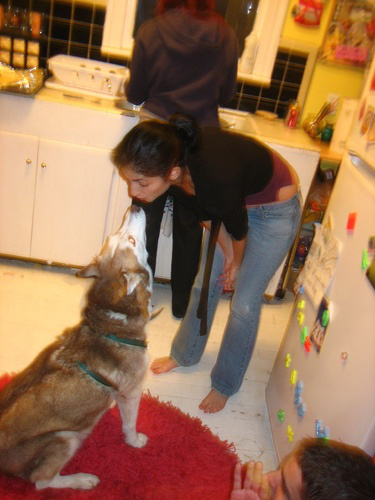

In [35]:
afk = images[index]
yolo.cfg.__data__['threshhold'] = 0.2
objs = yolo.feed_forward(afk, draw = True, supression="none", save_image = False, save_json = False)
for obj in objs:
    print(obj)
index += 1